In [14]:
import numpy as np
import numpy.linalg as lin
import pandas as pd
import matplotlib.pyplot as plt


k=2
col = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
dataset=pd.read_csv('que1.csv',names=col)



In [15]:

vals = pd.to_numeric(dataset["normalized-losses"], errors='coerce')
dataset["normalized-losses"] = vals.fillna(vals.mean())
vals = pd.to_numeric(dataset["bore"], errors='coerce')
dataset["bore"] = vals.fillna(vals.mean())
vals = pd.to_numeric(dataset["stroke"], errors='coerce')
dataset["stroke"] = vals.fillna(vals.mean())
vals = pd.to_numeric(dataset["horsepower"], errors='coerce')
dataset["horsepower"] = vals.fillna(vals.mean())
vals = pd.to_numeric(dataset["horsepower"], errors='coerce')
dataset["horsepower"] = vals.fillna(vals.mean())
vals = pd.to_numeric(dataset["peak-rpm"], errors='coerce')
dataset["peak-rpm"] = vals.fillna(vals.mean())
vals = pd.to_numeric(dataset["price"], errors='coerce')
dataset["price"] = vals.fillna(vals.mean())

dataset["num-of-doors"] = vals.fillna('four')


#dataset['normalized-losses'].fillna(value=mean_value, inplace=True)
pd.options.mode.chained_assignment = None

dataset=dataset.replace('?', np.nan)
mean_value=dataset['normalized-losses'].mean()

In [16]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,13495.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,16500.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,16500.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,13950.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,17450.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,16845.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,19045.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,21485.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,22470.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [4]:
fuel=pd.get_dummies(dataset['fuel-type'])
doors=pd.get_dummies(dataset['num-of-doors'])
drivewheels=pd.get_dummies(dataset['drive-wheels'])
cylinders=pd.get_dummies(dataset['num-of-cylinders'])

dataset=pd.concat([dataset,fuel],axis=1)
dataset=pd.concat([dataset,doors],axis=1)
dataset=pd.concat([dataset,drivewheels],axis=1)
dataset=pd.concat([dataset,cylinders],axis=1)

In [5]:
dataset['num-of-cylinders']=dataset['num-of-cylinders'].replace("two",2)
dataset['num-of-cylinders']=dataset['num-of-cylinders'].replace("three",3)
dataset['num-of-cylinders']=dataset['num-of-cylinders'].replace("four",4)
dataset['num-of-cylinders']=dataset['num-of-cylinders'].replace("five",5)
dataset['num-of-cylinders']=dataset['num-of-cylinders'].replace("six",6)
dataset['num-of-cylinders']=dataset['num-of-cylinders'].replace("eight",8)
dataset['num-of-cylinders']=dataset['num-of-cylinders'].replace("twelve",12)

In [6]:
dataset['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 205, dtype: int64

In [7]:
dataset.dtypes
change=['normalized-losses','bore','num-of-cylinders','stroke','horsepower','peak-rpm','price']
dataset[change]=dataset[change].astype(float)

final_data= ['symboling','normalized-losses', 'diesel','two','4wd','num-of-cylinders','wheel-base', 'length', 'width', 
                      'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                      'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

finalx= dataset[final_data]

In [8]:


#normalized= (finalx - finalx.min())/(finalx.max() - finalx.min())
#normalized['price']=finalx['price']
normalized=finalx

In [9]:
index = np.random.permutation(205)
shuffled_data = normalized.reindex(index)
# divided the data into 70:30 ratio
train=shuffled_data.iloc[0:143]
test=shuffled_data.iloc[144:]
    

    

In [12]:

def knn_output(x,k,train1):
    l=0
    dist = []
    #for index, row in train1.iterrows():
     #   dist.append(lin.norm(row-x, ord=2))     
    dist= lin.norm(train1.to_numpy() - x.to_numpy(),ord=2,axis=1)
    
    d=np.argsort(dist)
    avg=0
    for i in range(k):
        avg=avg+train1.iloc[d[i],[-1]] 
    return avg/k
# the knn function will take the train and test data and ouput the rsme value by comparing the 
# predicted and the actual value 
def knn(test,train,k):
    sum=0
    for index, row in test.iterrows():
        #print(knn_output(row,2,train))
        #print(row['price'])
        #this will be calculating the euclidean dist. of test point from each training points
        
        sum=sum+((abs(knn_output(row,k,train)-row['price']))**2)
    rsme=np.sqrt(sum/len(test))
    return rsme
print('The RSME root mean square error taking k=2 for the dataset is :')
knn(test,train,2)    
    

The RSME root mean square error taking k=2 for the dataset is :


price    335.476255
dtype: float64

In [13]:
###Q1 (b)
#spli_data function will split the data into test and training set with the ratio 
def split_data(data,ratio):
    train_size=int(len(data)*ratio)
    s= np.random.permutation(len(data))
    train_index=s[:train_size]
    test_index=s[train_size:]
    return data.iloc[train_index], data.iloc[test_index]
rsme_list=[]
#this loop here will be useing the k value assumptions (1 to 10 ) and will split the trainning data 
# p number of times and calculate the avg rsme for each value of k
for i in range(1,11):
    k=i
    #print(k)
    rsme_avg=0
    p=5
    for i in range(p):
        train_cv, test_cv= split_data(train,0.8)
        rsme_avg=rsme_avg +float( knn(test_cv,train_cv,k))
        #print('hi')
    rsme_list.append(rsme_avg/(p))
    #print(rsme_avg/p)

    
print("The best k possible is :")
print(rsme_list.index(min(rsme_list))+1)
#print(rsme_list.index(min(rsme_list))+1)
print('The rsme values using the cross validation techniques are : ')
print('Each value is a mean of almost 10 times random split for every possible k :')
print(rsme_list)


    
    
    

The best k possible is :
3
The rsme values using the cross validation techniques are : 
Each value is a mean of almost 10 times random split for every possible k :
[480.47782300170866, 545.2329997376451, 451.05380163149204, 465.8261353555813, 654.6919684771909, 623.5244348013108, 786.6730442111015, 556.4822747910569, 1374.9495149651852, 591.0986697100453]


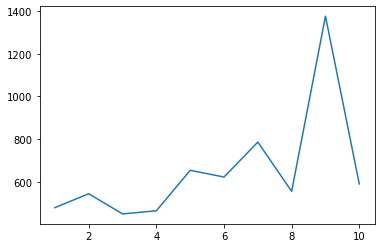

In [17]:
#the plot gives the k values and rsme relation

k_val= range(1,11)
rsme_val = rsme_list
plt.plot(k_val, rsme_val)

In [18]:
## Q 2

col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
incomeData = pd.read_csv("que2.csv",names=col)
incomeData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
#data preprocessing for the incomeData
#replacing the '?' values and dropping them for the final_data

print("\nMissing values after: \n\n", incomeData.isnull().sum(), "\n")
incomeData=incomeData.replace('?', np.nan)
incomeData=incomeData.dropna()


Missing values after: 

 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64 



In [20]:
map = {'Male': 1, 'Female': 2}

incomeData['sex'] = incomeData['sex']. replace (" Male",1)
incomeData['sex'] = incomeData['sex']. replace (" Female",2)

incomeData['income'] = incomeData['income']. replace (" <=50K",-1)
incomeData['income'] = incomeData['income']. replace (" >50K",1)
incomeData['education']=incomeData['education'].replace(" Bachelors",1)
incomeData['education']=incomeData['education'].replace(" Some-college",2)
incomeData['education']=incomeData['education'].replace(" 11th",3)
incomeData['education']=incomeData['education'].replace(" HS-grad",4)
incomeData['education']=incomeData['education'].replace(" Prof-school",5)
incomeData['education']=incomeData['education'].replace(" Assoc-acdm",6)
incomeData['education']=incomeData['education'].replace(" Assoc-voc",7)
incomeData['education']=incomeData['education'].replace(" 9th",8)
incomeData['education']=incomeData['education'].replace(" 7th-8th",9)
incomeData['education']=incomeData['education'].replace(" 12th",10)
incomeData['education']=incomeData['education'].replace(" Masters",11)
incomeData['education']=incomeData['education'].replace(" 1st-4th",12)
incomeData['education']=incomeData['education'].replace(" 10th",13)
incomeData['education']=incomeData['education'].replace(" Doctorate",14)
incomeData['education']=incomeData['education'].replace(" 5th-6th",15)
incomeData['education']=incomeData['education'].replace(" Preschool",16)

incomeData.head()
occu=pd.get_dummies(incomeData['occupation'])
incomeData=pd.concat([incomeData,occu],axis=1)
#final numerical_ value features that will be used for trainning 
final_data1= ['age', 'education','education-num','sex', 'capital-gain', 'capital-loss', 
                      'hours-per-week',
              ' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical',' Farming-fishing', ' Transport-moving', ' Priv-house-serv', ' Protective-serv',' Armed-Forces'
                    ]

final_incomeData= incomeData[final_data1]


In [717]:
final_incomeData

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,Tech-support,Tech-support,Tech-support,...,Transport-moving,Priv-house-serv,Priv-house-serv,Priv-house-serv,Protective-serv,Protective-serv,Protective-serv,Armed-Forces,Armed-Forces,Armed-Forces
0,39,1,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,1,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,4,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,3,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,1,13,2,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,6,12,2,0,0,38,1,1,1,...,0,0,0,0,0,0,0,0,0,0
32557,40,4,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,58,4,9,2,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,22,4,9,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def entropy(col):
    
    value,count = np.unique(col,return_counts = True)
    entry=0
    for i in range(len(value)):
        entry=entry+(-count[i]/np.sum(count))*np.log2(count[i]/np.sum(count))
    return entry
def info_gain( self, nPos, nNeg):

    total_entropy = entropy(incomeData['income'])
    total=nPos+nNeg
    wt_entropy= -(nPos/total*np.log2(nPos/total))-(nNeg/total*np.log2(nNeg/total))

    Information_Gain = total_entropy - wt_entropy
    return Information_Gain   


class Tree:
    def __init__( self, leafsize = 10, depth = 5 ):
        self.root = Node()
        self.maxLeafSize =leafsize
        self.maxDepth =depth 
        
    def predict( self, xt, yt ):
        return self.root.predict(  np.array[xt, yt]  )
    
    def train( self, x, y ):
        self.root.train( x, y, self.maxLeafSize, self.maxDepth )




In [22]:
train_dt,test_dt=split_data(final_incomeData,0.7)
x_dt= train_dt.iloc[:,:-1].values
y_dt=train_dt.iloc[:,-1].values

x_test= test_dt.iloc[:,:-1].values
y_test=test_dt.iloc[:,-1].values